In [117]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import math
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

In [14]:
##This section just preprocessing data and saving it to .csv
test = pd.read_csv('test.csv', dtype={'LotFrontage': np.float32, 'MasVnrArea': np.float32, 'GarageYrBlt': np.float32})
train = pd.read_csv('train.csv', dtype={'LotFrontage': np.float32, 'MasVnrArea': np.float32, 'GarageYrBlt': np.float32})
train = train.drop('SalePrice', axis=1)
train.head()
alldata = pd.concat([train, test])
alldata.set_index('Id', inplace=True)
alldata.head()
alldata = alldata._get_numeric_data().fillna(0)
alldata['LotFrontage'] = alldata['LotFrontage'].replace(np.nan, 0).astype('int64')
alldata['MasVnrArea'] = alldata['MasVnrArea'].replace(np.nan, 0).astype('int64')
alldata['GarageYrBlt'] = alldata['GarageYrBlt'].replace(np.nan, 0).astype('int64')
alldata.to_csv('alldata_numeric_only.csv', index=True)

In [183]:
## load in the preprocessed data and the sale prices for training data
data = pd.read_csv('alldata_numeric_only.csv')
data.set_index('Id', inplace=True)

train_raw = pd.read_csv('train.csv')
train_raw.set_index('Id', inplace=True)
logprices = np.log10(train_raw.SalePrice)

In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
columns = list(data.columns)

/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bhalbur/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
scaled = pd.DataFrame(data_scaled, columns=columns)
scaled.index +=1
train = scaled.loc[1:1460,]
test = scaled.loc[1461:2919,]
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,-0.005656,-0.004284,0.044221,0.007266,0.009673,-0.001485,0.028782,0.009625,0.005198,-0.017830,...,0.001242,0.004227,-0.012233,-0.017813,0.032057,-0.017826,0.014221,-0.012933,0.040096,0.017506
std,0.995065,1.035500,1.265751,0.981053,0.999874,0.997248,0.988255,1.010667,1.001252,0.953705,...,0.992140,0.990782,0.980642,0.951519,1.164132,0.992571,1.126746,0.874526,0.996069,1.010159
min,-0.873616,-1.725621,-1.124590,-3.610024,-4.101368,-3.279137,-1.640173,-0.567016,-0.968705,-0.293025,...,-2.193574,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.063150,-0.089592,-1.920603,-1.363569
25%,-0.873616,-0.470987,-0.331566,-0.772552,-0.507284,-0.571638,-0.826417,-0.567016,-0.968705,-0.293025,...,-0.641361,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.063150,-0.089592,-0.446925,-0.602962
50%,-0.167905,0.156330,-0.087452,-0.063185,-0.507284,0.055709,0.466021,-0.567016,-0.126824,-0.293025,...,0.033817,-0.740760,-0.332823,-0.359601,-0.103331,-0.285935,-0.063150,-0.089592,-0.078505,0.157646
75%,0.302568,0.634286,0.181772,0.646183,0.391237,0.947203,0.944701,0.351485,0.594866,-0.293025,...,0.479295,0.587251,0.303612,-0.359601,-0.103331,-0.285935,-0.063150,-0.089592,0.658334,0.918253
max,3.125411,7.624389,26.006354,2.774287,3.086800,1.277386,1.231909,8.380332,11.421314,8.421127,...,4.386510,6.033680,7.393195,8.234081,20.068324,8.258830,20.633563,27.232571,2.132012,1.678860


In [52]:
linreg = LinearRegression()
linreg.fit(train, logprices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Results vs Actual Values')

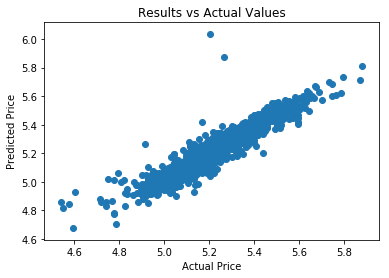

In [53]:
yhat = linreg.predict(train)
y = logprices
plt.scatter(y, yhat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results vs Actual Values')

In [88]:
print("R squared:",linreg.score(train, y, sample_weight=None))

R squared: 0.8684181144460764


In [106]:
RMSE = math.sqrt(mean_squared_error(y, yhat))
print("Root Mean Squared Error:",RMSE)

Root Mean Squared Error: 0.06290686448114662


In [109]:
coeff = pd.DataFrame({'Variable': list(train.columns), 'Coefficient Value': linreg.coef_*100})
coeff

,Variable,Coefficient Value
0,MSSubClass,-1.22
1,LotFrontage,-0.20
2,LotArea,0.63
3,OverallQual,5.19
4,OverallCond,2.33
5,YearBuilt,3.74
6,YearRemodAdd,1.03
7,MasVnrArea,0.03
8,BsmtFinSF1,"14,461,310,180,657.50"
9,BsmtFinSF2,"5,369,884,124,515.97"


# Above shows the same super-corellated variables
- Our submission from the above had RMSE of .14153
- On the training data the RMSE is .06290
- This indicates overfitting which we can see the super-correlated variables are kind of wack

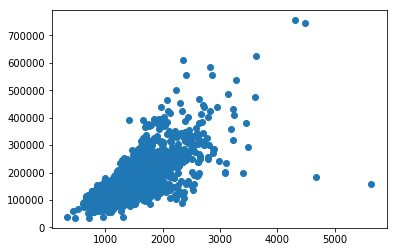

In [185]:
plt.scatter(train_raw['GrLivArea'],train_raw['SalePrice'])

In [186]:
outliers = list(train_raw[(train_raw['GrLivArea']>4000) & (train_raw['SalePrice']<300000)].index)
outliers

[524, 1299]

In [187]:
##Drop some of the correlated and categorical variables
dropcols = ['MSSubClass','MasVnrArea','TotalBsmtSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd']
droprows = outliers
trim = scaled.drop(columns=dropcols)
trim = trim.drop(droprows)
trimprices = logprices.drop(droprows)

R squared: 0.9010853962850998
Root Mean Squared Error: 0.054577852091967256


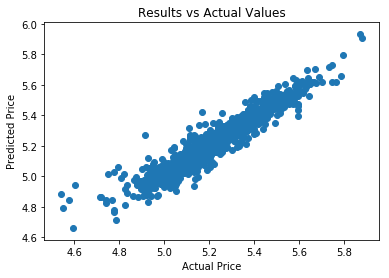

In [188]:
train = trim.loc[1:1460,]
test = trim.loc[1461:2919,]
linreg = LinearRegression()
linreg.fit(train, trimprices)
yhat = linreg.predict(train)
y = trimprices
plt.scatter(y, yhat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results vs Actual Values')
print("R squared:",linreg.score(train, y, sample_weight=None))
RMSE = math.sqrt(mean_squared_error(y, yhat))
print("Root Mean Squared Error:",RMSE)

In [179]:
## Used this to confirm the outliers
yhat_df = pd.DataFrame({'yhat':yhat},train.index)
yhat_df.sort_values(by=['yhat'], ascending=False).head(5)

,yhat
1183,5.93
692,5.91
1170,5.79
441,5.73
770,5.72


In [180]:
coeff = pd.DataFrame({'Variable': list(train.columns), 'Coefficient Value': linreg.coef_*100})
coeff

,Variable,Coefficient Value
0,LotFrontage,0.44
1,LotArea,0.87
2,OverallQual,4.39
3,OverallCond,2.44
4,YearBuilt,3.84
5,YearRemodAdd,1.10
6,BsmtFinSF1,3.73
7,BsmtFinSF2,0.89
8,BsmtUnfSF,2.21
9,1stFlrSF,4.93


## Export to .csv for uploading

In [181]:
submission = pd.DataFrame({'Id':test.index, 'SalePrice': np.power(10, linreg.predict(test))})
submission.set_index('Id', inplace=True)
print(submission.head())
timestamp = datetime.now().strftime('%m-%d-%H-%M-%S')

      SalePrice
Id             
1461 121,386.73
1462 146,773.50
1463 176,446.11
1464 196,229.92
1465 186,844.14


In [182]:
submission.to_csv(f'submission_files/Sub{timestamp}.csv')